In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=fa7c5abfe872a8f0544288a81a9686c38bc33ed41a33a243d40888cea3bb588a
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [4]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/CNN1D.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [5]:
dm = DataManager(transformer=False, micro=False)
X_trainhalflife, X_trainpromoter, y_train, _, _                 = dm.get_train(True, False, False)
X_validationhalflife, X_validationpromoter, y_validation, _, _  = dm.get_validation(True, False, False)
X_testhalflife, X_testpromoter, y_test, _, _                    = dm.get_test(True, False, False)

Preprocessing-> Padding

In [6]:
leftpos  = 3_000          #3_000 
rightpos = 13_500         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [7]:
X_trainpromoter_p      = X_trainpromoter[:, leftpos:rightpos]
X_validationpromoter_p = X_validationpromoter[:, leftpos:rightpos]
X_testpromoter_p       = X_testpromoter[:, leftpos:rightpos]

(None, 2000, 4)
model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10500, 4)]   0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 1050, 4)      0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_2 (Sli (None, 1050, 4)      0           input_1[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_3 (Sli (None, 1050, 4)      0           input_1[0][0]                    
__________________________________________________________________

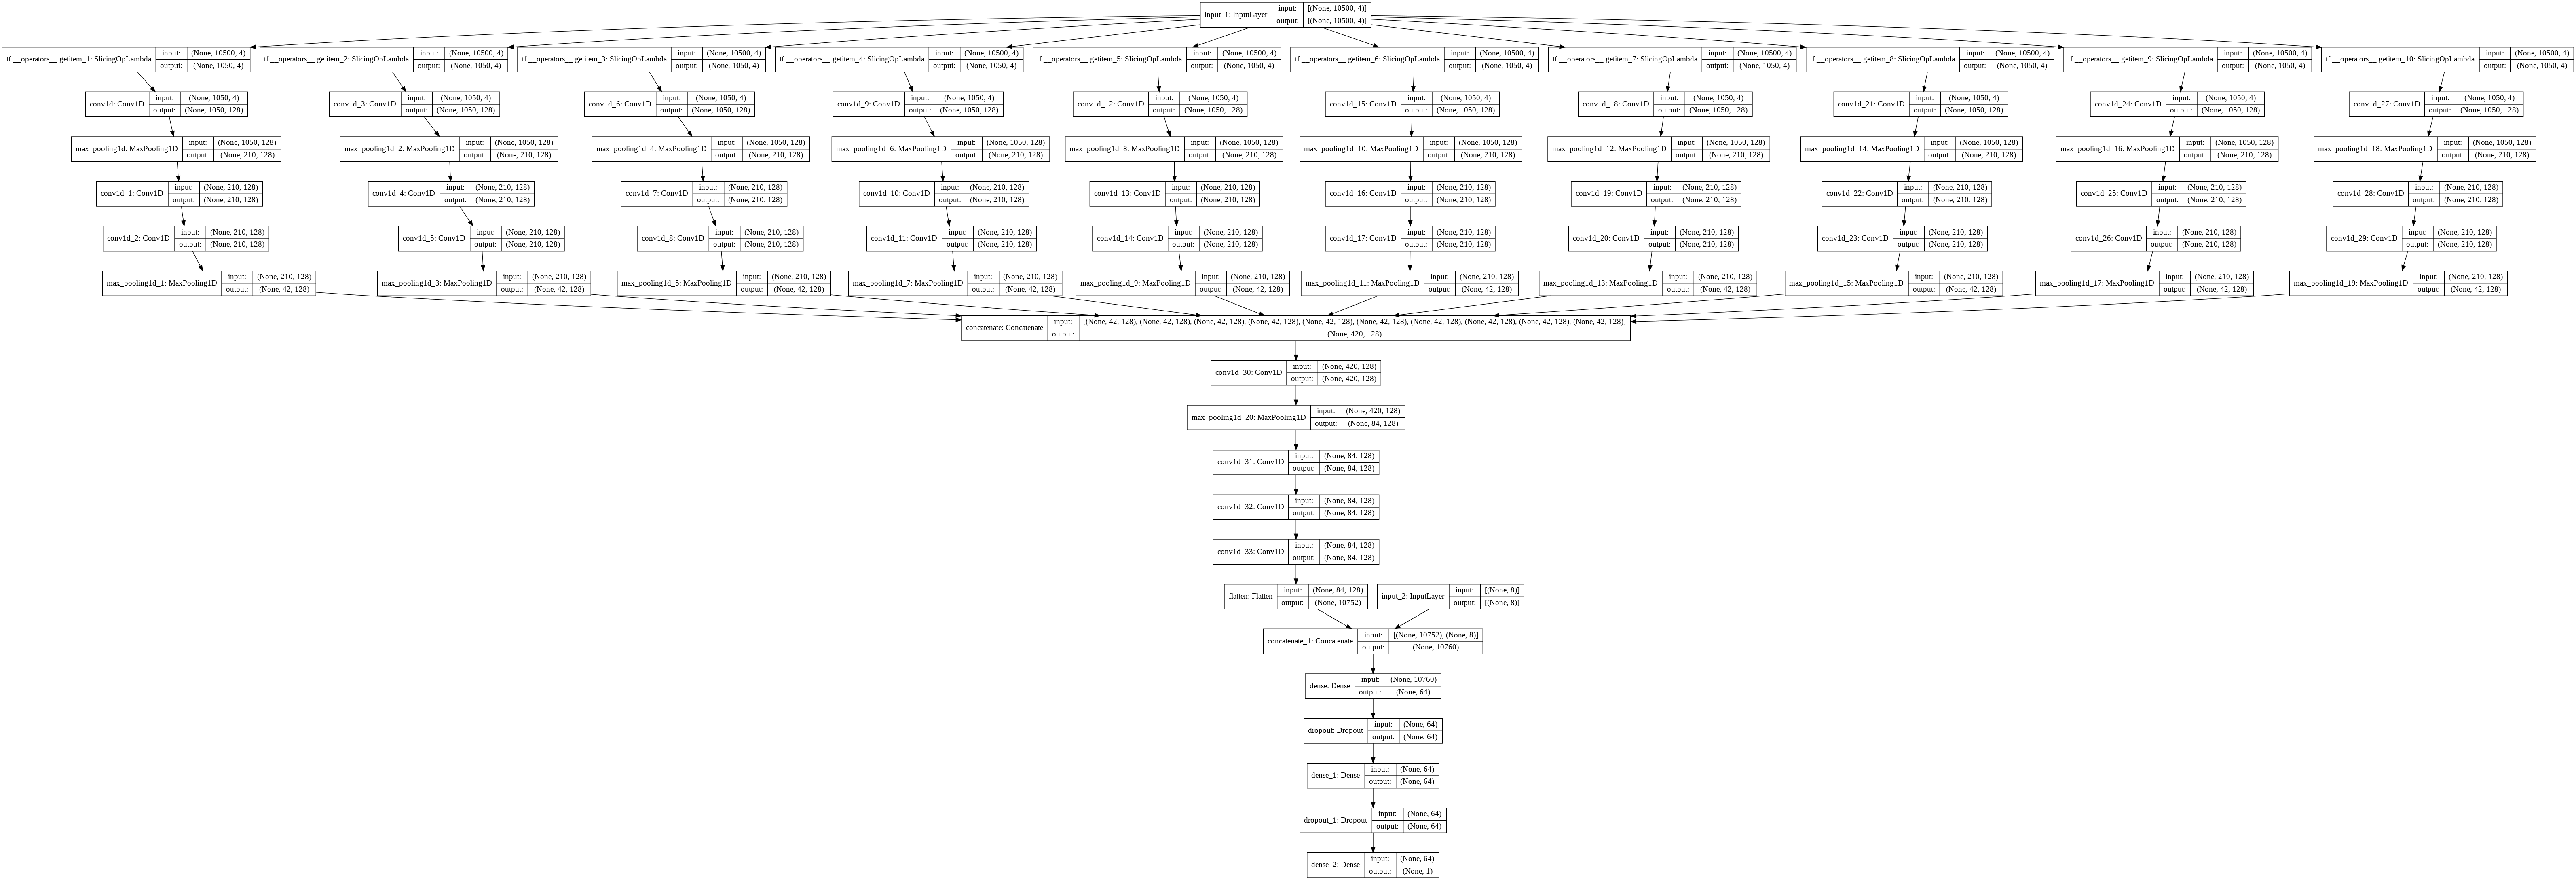


Parameters:
{'checkpoint_dir': 'DivideEtimpera_tuning/', 'model_type': 'DivideEtImpera', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.001, 'momentum': 0.9, 'CNN_input': (10500, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': 70, 'shuffle': True, 'logdir': None, 'patience': 15, 'opt': 'SGD', 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fccd2fc3690>}

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/64 [==============================] - 56s 344ms/step - loss: 0.9302 - val_loss: 0.8845

Epoch 00001: val_loss improved from inf to 0.88453, saving model to Saved_Models/checkpoint/DivideEtimpera_tuning/bestmodel_CNN1D_DivideEtImpera
INFO:tensorflow:Assets written to: Saved_Models/checkpoint/DivideEtimpera_tuning/bestmodel_CNN1D_DivideEtImpera/assets
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
64/6

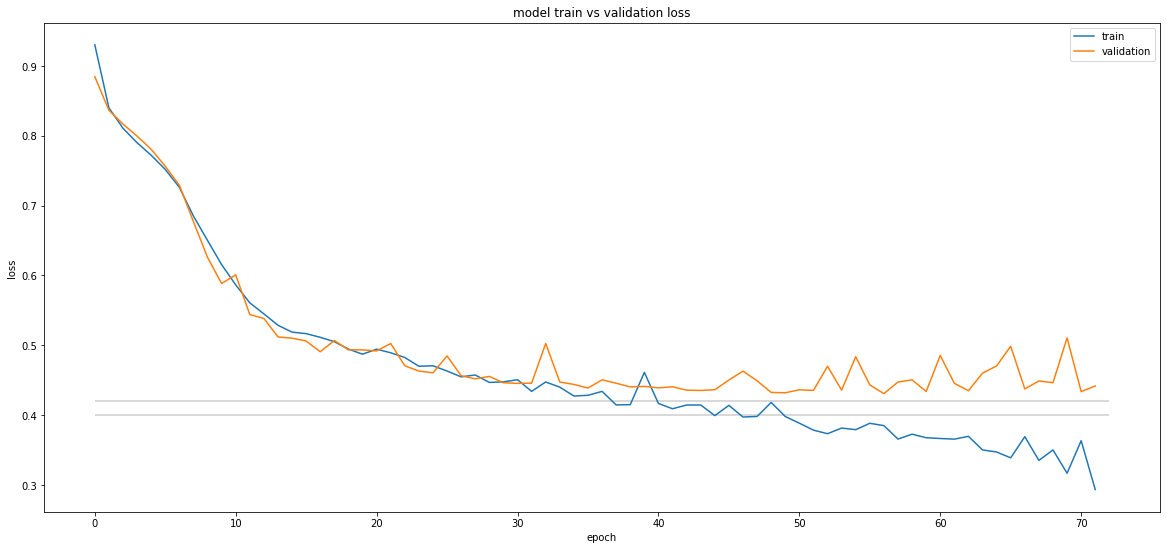

In [9]:
# # Clear any logs from previous runs
#!rm -rf ./logs/DivideEtImpera_0-006/
# maxlen=2000
model_type="DivideEtImpera"
checkpoint_dir="DivideEtimpera_tuning/"
logdir = None
net = projCNN1D(checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=300, batch_size=256, lr_reduction_epoch=70,
                learning_rate=1e-3, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir, momentum=0.9, patience=15)
net.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation)

In [10]:
net.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.583


0.5826247655371122

In [11]:
net.evaluate_best([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.582


0.5820781097328761

No handles with labels found to put in legend.


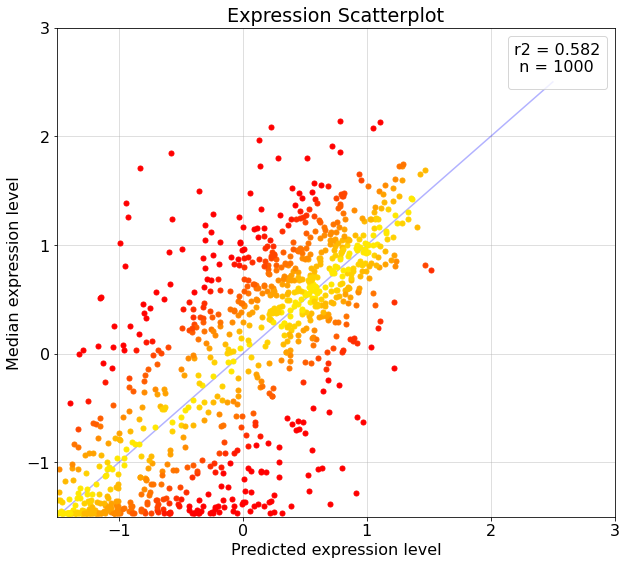

In [12]:
net.plot_r2([X_testpromoter_p, X_testhalflife], y_test)

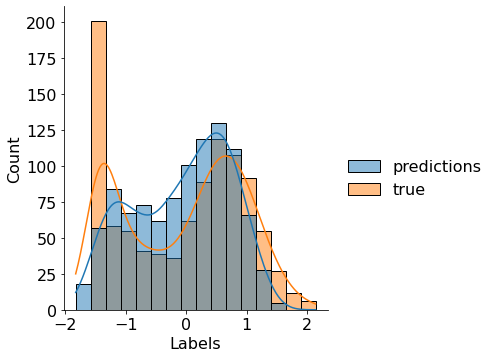

In [13]:
net.plot_kde([X_testpromoter_p, X_testhalflife], y_test)